In [9]:
nb_bench = 5
col_name = ["func", "start", "end", "filename", "worker", "thread", "process"

In [24]:
from math import sqrt
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def plot_results(exp_type, exp_names, xlabel, xticks_label):
    # Path to result file
    spark_file = "../{0}/data-{1}/results-spark_{0}-{2}.csv"
    dask_bag_file = "../{0}/data-{1}/results-dask-bag_{0}-{2}.csv"
    dask_delayed_file = "../{0}/data-{1}/results-dask-delayed_{0}-{2}.csv"

    # Retrieve file name
    spark = [
        [
            pd.read_csv(
                spark_file.format(exp_type, nth_bench, exp_name), names=col_name
            ).end.max()
            for nth_bench in range(1, nb_bench + 1)
            if os.path.exists(spark_file.format(exp_type, nth_bench, exp_name))
        ]
        for exp_name in exp_names
    ]

    dask_bag = [
        [
            pd.read_csv(
                dask_bag_file.format(exp_type, nth_bench, exp_name), names=col_name
            ).end.max()
            for nth_bench in range(1, nb_bench + 1)
            if os.path.exists(dask_bag_file.format(exp_type, nth_bench, exp_name))
        ]
        for exp_name in exp_names
    ]
    
    dask_bag = [
        [
            pd.read_csv(
                dask_delayed_file.format(exp_type, nth_bench, exp_name), names=col_name
            ).end.max()
            for nth_bench in range(1, nb_bench + 1)
            if os.path.exists(dask_delayed_file.format(exp_type, nth_bench, exp_name))
        ]
        for exp_name in exp_names
    ]

    # Calculate statistics
    spark_stat = {"mean": list(map(np.mean, spark)), "std": list(map(np.std, spark))}
    dask_bag_stat = {
        "mean": list(map(np.mean, dask_bag)),
        "std": list(map(np.std, dask_bag)),
    }
    dask_delayed_stat = {
        "mean": list(map(np.mean, dask_bag)),
        "std": list(map(np.std, dask_bag)),
    }

    # Generate plot
    fig, ax = plt.subplots(figsize=(10, 5))

    barWidth = 0.15

    # Set position of bar on X axis
    r1 = np.arange(len(spark))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    plt.bar(
        r1,
        spark_stat["mean"],
        yerr=spark_stat["std"],
        color="blue",
        width=barWidth,
        edgecolor="black",
        alpha=0.66,
        label="spark",
    )
    plt.bar(
        r2,
        dask_bag_stat["mean"],
        yerr=dask_bag_stat["std"],
        color="crimson",
        width=barWidth,
        edgecolor="black",
        alpha=0.66,
        label="dask.bag",
    )
    plt.bar(
        r3,
        dask_delayed_stat["mean"],
        yerr=dask_delayed_stat["std"],
        color="orange",
        width=barWidth,
        edgecolor="black",
        alpha=0.66,
        label="dask.bag",
    )

    # Add xticks on the middle of the group bars
    plt.xlabel(xlabel, fontweight="bold")
    plt.xticks([r + barWidth for r in range(len(spark))], xticks_label)
    plt.ylabel("Makespan")

    plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.02))
    plt.show()

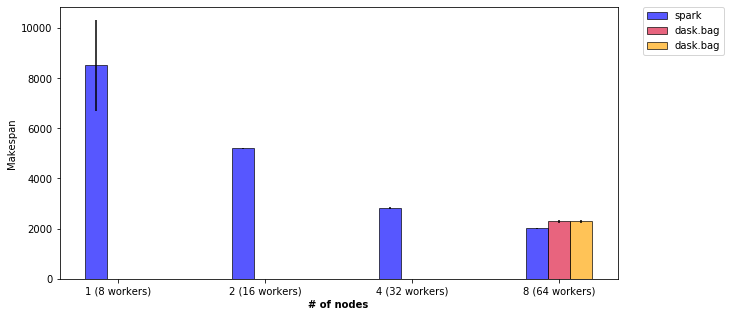

In [25]:
exp_type = "histogram"
exp_names = ["1node", "2node", "4node", "baseline"]
xlabel = "# of nodes"
xticks_label = ["1 (8 workers)", "2 (16 workers)", "4 (32 workers)", "8 (64 workers)"]

plot_results(exp_type, exp_names, xlabel, xticks_label)

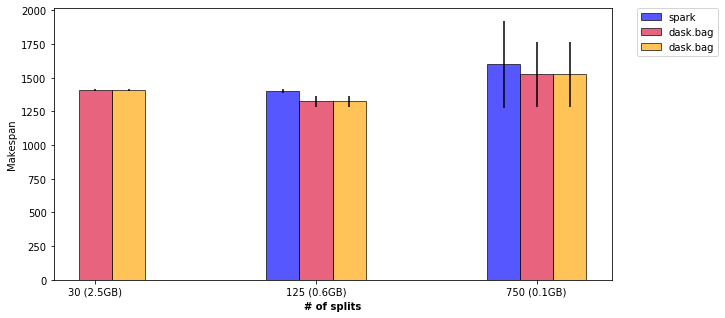

In [26]:
exp_type = "inc"
exp_names = ["30chunks", "baseline", "750chunks"]
xlabel = "# of splits"
xticks_label = ["30 (2.5GB)", "125 (0.6GB)", "750 (0.1GB)"]

plot_results(exp_type, exp_names, xlabel, xticks_label)